<a href="https://colab.research.google.com/github/sachi9004/AnalyticsVidhya_BlackFriday/blob/master/Emergency%20%26%20non%20Emergency%20vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab's New Code Editor

Colab is moving to a new code editor which includes:
* Richer completions
* Additional keybinding options
* Improved accessibility

## Enabling and disabling the new editor

The new editor can be controlled with the experiment button in the top-right.

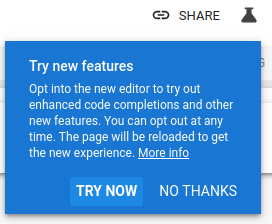
### Issues
You can disable the new editor if you run into issues, but please do let us know why so that we can fix any complaints.

Bugs can be filed at https://github.com/googlecolab/colabtools/issues/new, or use the 'Send feedback...' option in the Help menu.

# Automatic Completions

Code completions and documentation hints occur automatically while you type.

Use the following keyboard shortcuts:
 - `Ctrl-space` to re-open completions.
 - `Ctrl-shift-space` to re-open parameter hints.

![Rich completions](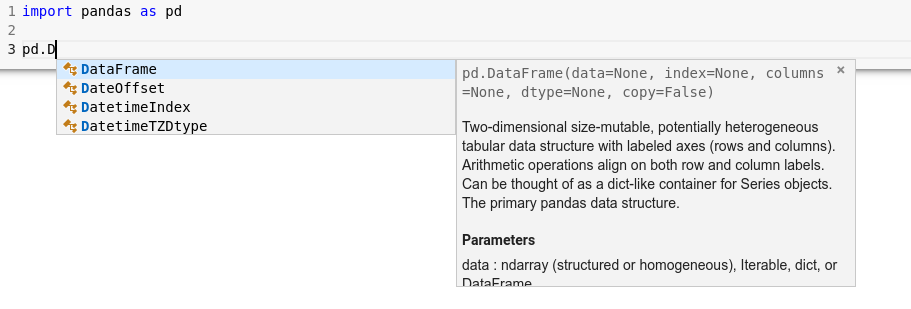
)




## Disabling automatic completions

Automatic completions can be disabled in Settings with the "Automatically trigger code completions" option.

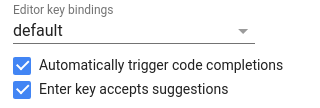

# Keyboard Bindings

The default editor keyboard bindings have been updated and there are now additional options for keybindings including:

* Vim
* Classic - restores some common keyboard shortcuts from the previous editor.

These options are available in Settings with the "Editor key bindings" option.

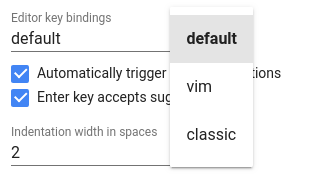

With automatic completions disabled use:
 - `Tab` to re-open completions.
 - `Shift-tab` to re-open parameter hints.

In [0]:
# importing the libraries
import pandas as pd
import numpy as np
from tqdm import tqdm

# for reading and displaying images
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

# torchvision for pre-trained models
from torchvision import models


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import zipfile

def main():

    # assigning filename to a variable
    file_name = '/content/drive/My Drive/Emergency vs non emergency vehicle/emergency_vs_non-emergency_dataset.zip'

    # opening Zip using 'with' keyword in read mode
    with zipfile.ZipFile(file_name, 'r') as file:
        # printing all the information of archive file contents using 'printdir' method
        print(file.printdir())

        # extracting the files using 'extracall' method
        print('Extracting all files...')
        file.extractall()
        print('Done!') # check your directory of zip file to see the extracted files

if __name__ == '__main__': main()


File Name                                             Modified             Size
emergency_vs_non-emergency_dataset/            2019-10-17 14:59:20            0
emergency_vs_non-emergency_dataset/emergency_train.csv 2018-08-28 21:03:16        19012
emergency_vs_non-emergency_dataset/images/     2018-08-30 12:08:20            0
emergency_vs_non-emergency_dataset/images/1265.jpg 2018-08-28 17:58:20        14229
emergency_vs_non-emergency_dataset/images/1260.jpg 2018-08-28 17:58:34        13037
emergency_vs_non-emergency_dataset/images/1259.jpg 2018-08-28 17:58:28        17105
emergency_vs_non-emergency_dataset/images/1256.jpg 2018-08-28 17:58:42        16993
emergency_vs_non-emergency_dataset/images/1255.jpg 2018-08-28 17:58:22        14180
emergency_vs_non-emergency_dataset/images/125.jpg 2018-08-28 17:58:26        15327
emergency_vs_non-emergency_dataset/images/1249.jpg 2018-08-28 17:58:44        12571
emergency_vs_non-emergency_dataset/images/1247.jpg 2018-08-28 17:58:50        15518
e

In [0]:
train = pd.read_csv('/content/emergency_train.csv')

In [5]:
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [7]:
# loading training images
train_img = []
for img_name in tqdm(train['image_names']):
    # defining the image path
    image_path = '/content/emergency_vs_non-emergency_dataset/images/' + img_name
    # reading the image
    img = imread(image_path)
    # normalizing the pixel values
    img = img/255
    # resizing the image to (224,224,3)
    img = resize(img, output_shape=(224,224,3), mode='constant', anti_aliasing=True)
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
train_x.shape


100%|██████████| 1646/1646 [00:17<00:00, 92.46it/s]


(1646, 224, 224, 3)

It is an Emergency vehicle


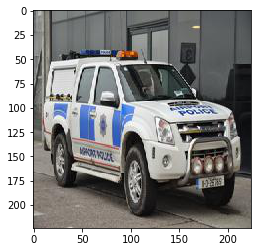

In [8]:
# Exploring the data
index = 10
plt.imshow(train_x[index])
if (train['emergency_or_not'][index] == 1):
    print('It is an Emergency vehicle')
else:
    print('It is a Non-Emergency vehicle')


In [0]:
train_y = train['emergency_or_not'].values

In [11]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 13, stratify=train_y) 
(train_x.shape, train_y.shape), (val_x.shape, val_y.shape) 


(((1481, 224, 224, 3), (1481,)), ((165, 224, 224, 3), (165,)))

In [12]:
# converting training images into torch format
train_x = train_x.reshape(1481, 3, 224, 224)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape


(torch.Size([1481, 3, 224, 224]), torch.Size([1481]))

In [13]:
val_x = val_x.reshape(165, 3, 224, 224) 
val_x  = torch.from_numpy(val_x) 
val_y = val_y.astype(int) 
val_y = torch.from_numpy(val_y) 
val_x.shape, val_y.shape

(torch.Size([165, 3, 224, 224]), torch.Size([165]))

In [0]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 8, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(8),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(8 * 56 * 56, 2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x


In [15]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.0001)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

print(model)


Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=25088, out_features=2, bias=True)
  )
)


In [16]:
# batch size of the model
batch_size = 128

# number of epochs to train the model
n_epochs = 15

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
        
    permutation = torch.randperm(train_x.size()[0])

    training_loss = []
    for i in tqdm(range(0,train_x.size()[0], batch_size)):

        indices = permutation[i:i+batch_size]
        batch_x, batch_y = train_x[indices], train_y[indices]
        
        if torch.cuda.is_available():
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
        
        optimizer.zero_grad()
        # in case you wanted a semi-full example
        outputs = model(batch_x)
        loss = criterion(outputs,batch_y)

        training_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    training_loss = np.average(training_loss)
    print('epoch: \t', epoch, '\t training loss: \t', training_loss)


 17%|█▋        | 2/12 [00:00<00:00, 15.42it/s]

epoch: 	 1 	 training loss: 	 0.849343791604042


 17%|█▋        | 2/12 [00:00<00:00, 15.56it/s]

epoch: 	 2 	 training loss: 	 0.6583286772171656


 17%|█▋        | 2/12 [00:00<00:00, 15.50it/s]

epoch: 	 3 	 training loss: 	 0.5867732018232346


 17%|█▋        | 2/12 [00:00<00:00, 15.72it/s]

epoch: 	 4 	 training loss: 	 0.573077991604805


 17%|█▋        | 2/12 [00:00<00:00, 15.53it/s]

epoch: 	 5 	 training loss: 	 0.5387182608246803


 17%|█▋        | 2/12 [00:00<00:00, 15.32it/s]

epoch: 	 6 	 training loss: 	 0.5195320819815


 17%|█▋        | 2/12 [00:00<00:00, 15.70it/s]

epoch: 	 7 	 training loss: 	 0.5138643905520439


 17%|█▋        | 2/12 [00:00<00:00, 15.17it/s]

epoch: 	 8 	 training loss: 	 0.49395496149857837


 17%|█▋        | 2/12 [00:00<00:00, 15.47it/s]

epoch: 	 9 	 training loss: 	 0.4506380756696065


 17%|█▋        | 2/12 [00:00<00:00, 15.49it/s]

epoch: 	 10 	 training loss: 	 0.42948275804519653


 17%|█▋        | 2/12 [00:00<00:00, 15.46it/s]

epoch: 	 11 	 training loss: 	 0.4141930192708969


 17%|█▋        | 2/12 [00:00<00:00, 15.60it/s]

epoch: 	 12 	 training loss: 	 0.39701730261246365


 17%|█▋        | 2/12 [00:00<00:00, 15.24it/s]

epoch: 	 13 	 training loss: 	 0.3864080533385277


 17%|█▋        | 2/12 [00:00<00:00, 15.28it/s]

epoch: 	 14 	 training loss: 	 0.38116103907426196


100%|██████████| 12/12 [00:00<00:00, 13.53it/s]

epoch: 	 15 	 training loss: 	 0.3534434388081233


In [18]:
Tensor.cpu()

NameError: ignored

In [17]:
# prediction for training set
prediction = []
target = []
permutation = torch.randperm(train_x.size()[0])
for i in tqdm(range(0,train_x.size()[0], batch_size)):
    indices = permutation[i:i+batch_size]
    batch_x, batch_y = train_x[indices], train_y[indices]

    if torch.cuda.is_available():
        batch_x, batch_y = batch_x.cuda(), batch_y.cuda()

    with torch.no_grad():
        output = model(batch_x.cuda())

    softmax = torch.exp(output).cpu()
    prob = list(softmax.numpy())
    predictions = np.argmax(prob, axis=1)
    prediction.append(predictions)
    target.append(batch_y)
    
# training accuracy
accuracy = []
for i in range(len(prediction)):
    accuracy.append(accuracy_score(target[i],prediction[i]))
    
print('training accuracy: \t', np.average(accuracy))


100%|██████████| 12/12 [00:00<00:00, 18.34it/s]


TypeError: ignored

# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```